##### Question-1

In [312]:
# Importing necessary libraries

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [314]:
# Reading the dataset

In [315]:
df=pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\brooklyn_listings.csv')
df.head(10)

,Unnamed: 0,price,bedrooms,bathrooms,sqft,neighborhood,status,address
0,1,4100000.0,4,5,2940.0,Park Slope,sold,"336A 4th St, Brooklyn, NY 11215"
1,2,1020000.0,3,1,NaN,Park Slope,sold,"411 15th St #K, Brooklyn, NY 11215"
2,3,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #D, Brooklyn, NY 11217"
3,4,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #E, Brooklyn, NY 11217"
4,5,908000.0,0,1,1066.0,Park Slope,sold,"397 1st St #4R, Brooklyn, NY 11215"
5,6,1270000.0,2,1,NaN,Park Slope,sold,"509 2nd St #1R, Brooklyn, NY 11215"
6,7,2600000.0,5,4,3600.0,Park Slope,sold,"645 Carroll St, Brooklyn, NY 11215"
7,8,4050000.0,4,4,3600.0,Park Slope,sold,"538 9th St #4, Brooklyn, NY 11215"
8,9,2400000.0,3,3,1428.0,Park Slope,sold,"910 Union St #7A, Brooklyn, NY 11215"
9,10,750000.0,1,1,566.0,Park Slope,sold,"180 Sterling Pl #15, Brooklyn, NY 11217"


In [316]:
del df['Unnamed: 0']
df

,price,bedrooms,bathrooms,sqft,neighborhood,status,address
0,4100000.0,4,5,2940.0,Park Slope,sold,"336A 4th St, Brooklyn, NY 11215"
1,1020000.0,3,1,NaN,Park Slope,sold,"411 15th St #K, Brooklyn, NY 11215"
2,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #D, Brooklyn, NY 11217"
3,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #E, Brooklyn, NY 11217"
4,908000.0,0,1,1066.0,Park Slope,sold,"397 1st St #4R, Brooklyn, NY 11215"
...,...,...,...,...,...,...,...
14728,630000.0,0,1,1492.0,Wingate,listed,"770A Lefferts Ave #4L, Brooklyn, NY 11203"
14729,998000.0,4,2,1584.0,Wingate,listed,"575 E New York Ave #A, Brooklyn, NY 11225"
14730,830000.0,0,1,564.0,Wingate,listed,"833 Maple St, Brooklyn, NY 11203"
14731,240000.0,0,1,NaN,Wingate,listed,"446 Kingston Ave #C20, Brooklyn, NY 11225"


In [317]:
df.describe()

,price,bedrooms,bathrooms,sqft
count,1.473200e+04,14733.000000,14733.000000,12013.000000
mean,1.318167e+06,2.771669,2.304079,2142.798885
std,1.825168e+06,2.888247,9.230676,6598.128111
min,1.000000e+00,0.000000,1.000000,1.000000
25%,5.750000e+05,1.000000,1.000000,980.000000
50%,9.300000e+05,2.000000,2.000000,1596.000000
75%,1.550000e+06,4.000000,3.000000,2628.000000
max,8.680000e+07,59.000000,1102.000000,443522.000000


In [318]:
df.shape

(14733, 7)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14733 entries, 0 to 14732
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14732 non-null  float64
 1   bedrooms      14733 non-null  int64  
 2   bathrooms     14733 non-null  int64  
 3   sqft          12013 non-null  float64
 4   neighborhood  14733 non-null  object 
 5   status        14733 non-null  object 
 6   address       14733 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 805.8+ KB


In [320]:
# Checking for missing values in the dataframe

In [321]:
df.isna().sum()

price              1
bedrooms           0
bathrooms          0
sqft            2720
neighborhood       0
status             0
address            0
dtype: int64

In [322]:
median_sqft = df['sqft'].median()
df['sqft'].fillna(median_sqft, inplace=True)

In [323]:
df['price'].fillna(method='bfill', inplace=True)

In [324]:
df.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft            0
neighborhood    0
status          0
address         0
dtype: int64

C:\Users\ramit\AppData\Local\Temp\ipykernel_27848\629074729.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


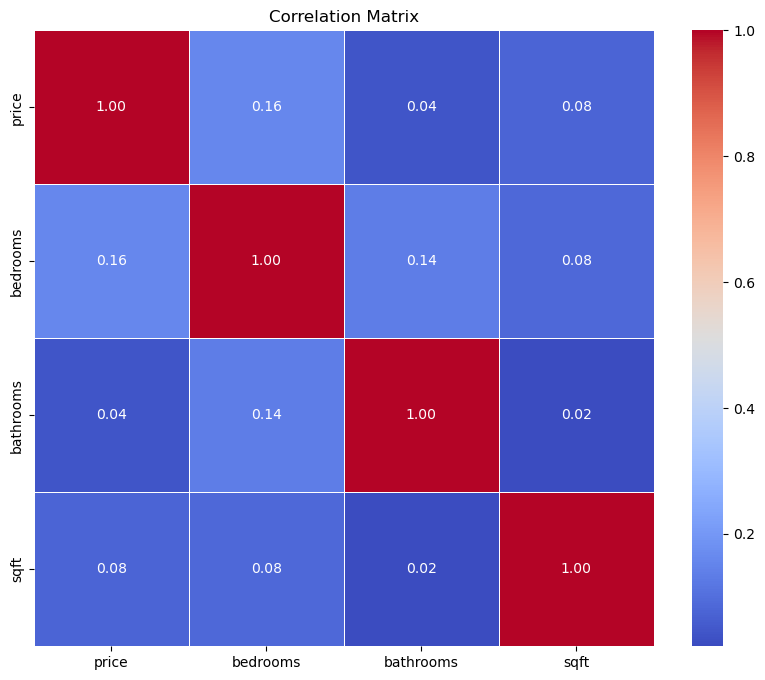

In [325]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [133]:
# Extracting features (excluding 'price', 'neighborhood', 'status', 'address') as X

In [391]:
X = df.drop(columns=['price', 'neighborhood', 'status', 'address'])

In [392]:
X

,bedrooms,bathrooms,sqft
0,4,5,2940.0
1,3,1,1596.0
2,0,1,1596.0
3,0,1,1596.0
4,0,1,1066.0
...,...,...,...
14728,0,1,1492.0
14729,4,2,1584.0
14730,0,1,564.0
14731,0,1,1596.0


In [393]:
# Extracting target variable ('price') as y

In [394]:
y=df['price']

In [395]:
y

0        4100000.0
1        1020000.0
2          45000.0
3          45000.0
4         908000.0
           ...    
14728     630000.0
14729     998000.0
14730     830000.0
14731     240000.0
14732     629000.0
Name: price, Length: 14733, dtype: float64

In [396]:
#X=X.reshape(-1,1)
#y=y.reshape(-1,1)

In [397]:
X

,bedrooms,bathrooms,sqft
0,4,5,2940.0
1,3,1,1596.0
2,0,1,1596.0
3,0,1,1596.0
4,0,1,1066.0
...,...,...,...
14728,0,1,1492.0
14729,4,2,1584.0
14730,0,1,564.0
14731,0,1,1596.0


In [398]:
y

0        4100000.0
1        1020000.0
2          45000.0
3          45000.0
4         908000.0
           ...    
14728     630000.0
14729     998000.0
14730     830000.0
14731     240000.0
14732     629000.0
Name: price, Length: 14733, dtype: float64

In [399]:
# Scatter plot showing the relationship between 'sqft' and 'price'

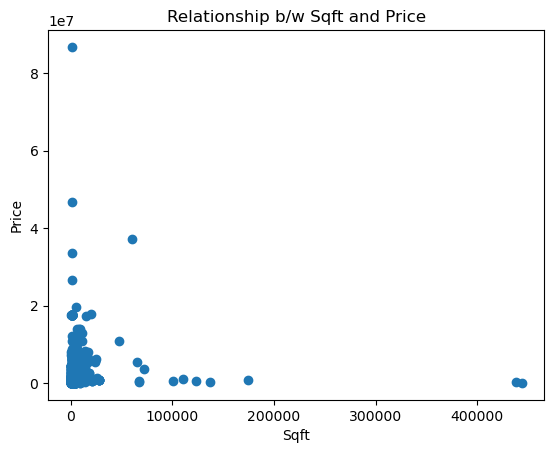

In [400]:
plt.scatter(df['sqft'],y,label='Scatter Plot')
plt.title('Relationship b/w Sqft and Price')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()

In [401]:
# Scatter plot showing the relationship between 'bedrooms' and 'price'

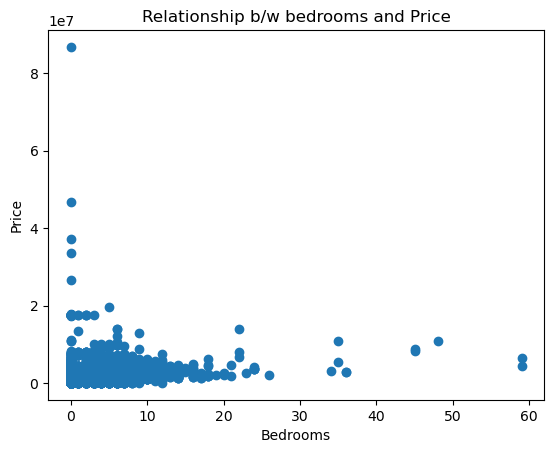

In [402]:
plt.scatter(df['bedrooms'],y,label='Scatter Plot')
plt.title('Relationship b/w bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [403]:
# Scatter plot showing the relationship between 'bathrooms' and 'price'

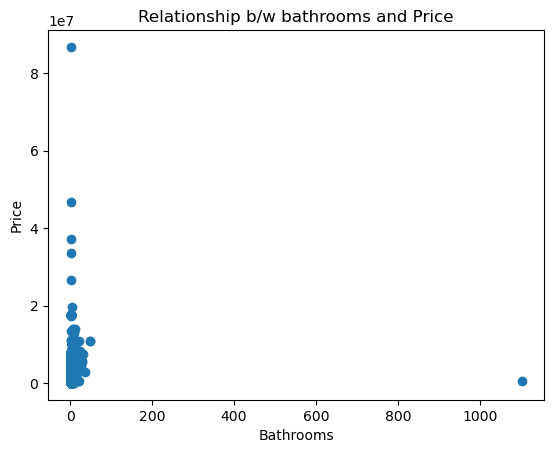

In [404]:
plt.scatter(df['bathrooms'],y,label='Scatter Plot')
plt.title('Relationship b/w bathrooms and Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

#### Polynomial Regression

In [405]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X)

In [406]:
X_poly

array([[1.00000000e+00, 4.00000000e+00, 5.00000000e+00, ...,
        7.35000000e+04, 4.32180000e+07, 2.54121840e+10],
       [1.00000000e+00, 3.00000000e+00, 1.00000000e+00, ...,
        1.59600000e+03, 2.54721600e+06, 4.06535674e+09],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.59600000e+03, 2.54721600e+06, 4.06535674e+09],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.64000000e+02, 3.18096000e+05, 1.79406144e+08],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.59600000e+03, 2.54721600e+06, 4.06535674e+09],
       [1.00000000e+00, 3.00000000e+00, 2.00000000e+00, ...,
        5.88000000e+03, 4.32180000e+06, 3.17652300e+09]])

In [407]:
X

,bedrooms,bathrooms,sqft
0,4,5,2940.0
1,3,1,1596.0
2,0,1,1596.0
3,0,1,1596.0
4,0,1,1066.0
...,...,...,...
14728,0,1,1492.0
14729,4,2,1584.0
14730,0,1,564.0
14731,0,1,1596.0


In [408]:
lr_1=LinearRegression()
lr_1.fit(X_poly,y)

LinearRegression()

In [409]:
y_pred_1=lr_1.predict(X_poly)
y_pred_1

array([2171312.33948602,  919831.75063284, 1133560.64552579, ...,
        818475.05258535, 1133560.64552579, 1099790.26631266])

In [410]:
mse=mean_squared_error(y,y_pred_1)
rmse=np.sqrt(mse)
print("The MSE value is: ",mse)
print("The RMSE value is:",rmse)

The MSE value is:  2963436055336.711
The RMSE value is: 1721463.3470790805


In [411]:
r2=r2_score(y,y_pred_1)
print("The R2 score is:",r2)

The R2 score is: 0.11029740770492369


In [412]:
a=lr.coef_
b=lr.intercept_,
print("The estimated model Slope is ",a)
print("The estiamted model intercept is ",b)

The estimated model Slope is  [9.50679045e+04 3.90877314e+03 1.90517249e+01]
The estiamted model intercept is  (1006717.2099117034,)


##### Question 2

In [413]:
temperature = np.array([0, 20, 40, 60, 80, 100]).reshape(-1, 1)
pressure = np.array([0.0002, 0.0012, 0.006, 0.03, 0.09, 0.27])

In [414]:
poly_reg = PolynomialFeatures(degree=2)  # Define the degree of the polynomial
X_poly = poly_reg.fit_transform(temperature)  # Transforming the input data

In [415]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, pressure)

LinearRegression()

In [416]:
y_pred = poly_reg_model.predict(X_poly)

In [417]:
mse = mean_squared_error(pressure, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(pressure, y_pred)

In [418]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.0004000103333333335
Root Mean Squared Error (RMSE): 0.020000258331664956
R-squared (R2) Score: 0.9568461098911795


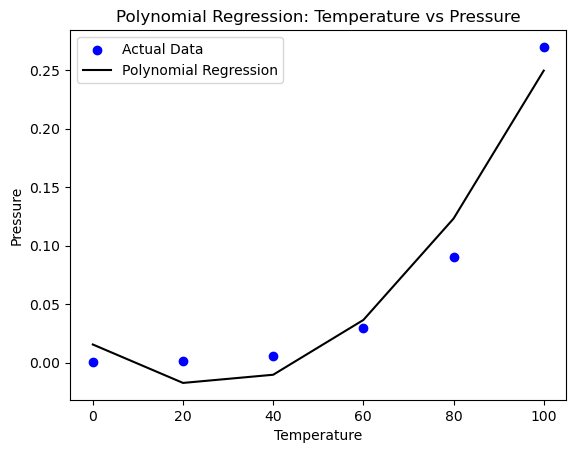

In [419]:
plt.scatter(temperature, pressure, color='blue', label='Actual Data')
plt.plot(temperature, y_pred, color='black', label='Polynomial Regression')
plt.title('Polynomial Regression: Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.show()

###### Question 3

In [420]:
df1=pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\Car price prediction.csv')

In [421]:
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [422]:
# Name and seller type dont seem to be relevant
df1.drop(['name', 'seller_type'], axis=1, inplace=True)

In [423]:
df1

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,2009,382000,120000,Diesel,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,2013,290000,25000,Diesel,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [424]:
df1.shape

(8128, 11)

In [425]:
df1.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [426]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        7907 non-null   object 
 7   engine         7907 non-null   object 
 8   max_power      7913 non-null   object 
 9   torque         7906 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


In [427]:
df1.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [428]:
df1.dropna(inplace=True)

In [429]:
df1['mileage'] = df1['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

In [430]:
df1

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Manual,First Owner,18.50,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.80,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,2009,382000,120000,Diesel,Manual,First Owner,19.30,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,2013,290000,25000,Diesel,Manual,First Owner,23.57,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [431]:
df1['engine'] = df1['engine'].str.replace(' CC', '').astype(float)

In [432]:
df1

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Manual,First Owner,18.50,1197.0,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.80,1493.0,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,2009,382000,120000,Diesel,Manual,First Owner,19.30,1248.0,73.9 bhp,190Nm@ 2000rpm,5.0
8126,2013,290000,25000,Diesel,Manual,First Owner,23.57,1396.0,70 bhp,140Nm@ 1800-3000rpm,5.0


In [433]:
df1['max_power']=df1['max_power'].str.replace('bhp',' ').astype(float)

In [434]:
df1

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,2007,135000,119000,Diesel,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,2009,382000,120000,Diesel,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,2013,290000,25000,Diesel,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


C:\Users\ramit\AppData\Local\Temp\ipykernel_27848\1308910352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


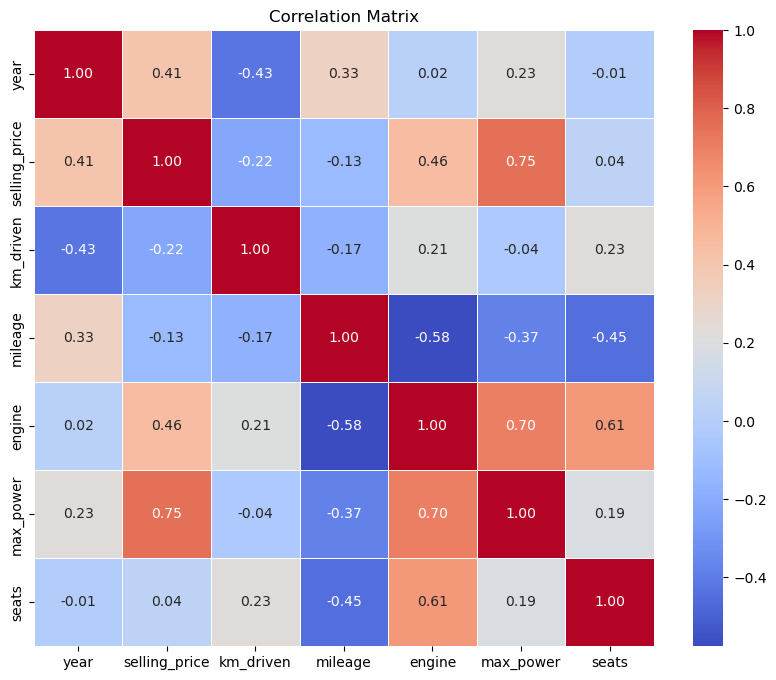

In [435]:
corr = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [436]:
X = df1[['engine', 'max_power','year','mileage']]
y = df1['selling_price']

In [437]:
X

,engine,max_power,year,mileage
0,1248.0,74.00,2014,23.40
1,1498.0,103.52,2014,21.14
2,1497.0,78.00,2006,17.70
3,1396.0,90.00,2010,23.00
4,1298.0,88.20,2007,16.10
...,...,...,...,...
8123,1197.0,82.85,2013,18.50
8124,1493.0,110.00,2007,16.80
8125,1248.0,73.90,2009,19.30
8126,1396.0,70.00,2013,23.57


In [438]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [440]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [441]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [442]:
y_pred_2= model.predict(X_test_poly)

In [443]:
y_pred_2

array([ 356043.80775881,  453032.28684044,  254033.74673319, ...,
        201633.32073259, 2691348.8703022 ,  604484.39227295])

In [444]:
a=model.coef_
b=model.intercept_,
print("The estimated model Slope is ",a)
print("The estiamted model intercept is ",b)

The estimated model Slope is  [ 0.00000000e+00  4.98122650e+04 -5.09045591e+06  3.56794269e+06
 -7.56589610e+06  1.27174934e-01 -6.77957239e+00 -2.46963124e+01
  1.00433133e+01  1.00770056e+02  2.53184855e+03 -3.59219597e+02
 -9.33374154e+02  3.77648633e+03 -3.44490771e+02]
The estiamted model intercept is  (-3400803305.2903914,)


In [445]:
r2 = r2_score(y_test, y_pred_2)
print(f"R-squared Score: {r2}")

R-squared Score: 0.8689061904795702
